In [72]:
import numpy as np
np.random.seed(30)

num_samples=500

weather = np.random.randint(2, size=num_samples)
equipment_availability = np.random.randint(2, size=num_samples)
physical_condition = np.random.randint(2, size=num_samples)
play = np.random.randint(2, size=num_samples)
random_dataset = np.column_stack((weather, equipment_availability, physical_condition, play))
print(random_dataset)

[[1 1 1 0]
 [1 0 0 0]
 [1 1 1 1]
 ...
 [1 0 0 1]
 [0 1 0 0]
 [1 1 0 1]]


In [141]:
import pandas as pd
columns = ["Weather", "Equipment Availability", "Physical Condition", "Play Sport"]
df = pd.DataFrame(data=random_dataset, columns=columns)
print(df.head())

   Weather  Equipment Availability  Physical Condition  Play Sport
0        1                       1                   1           0
1        1                       0                   0           0
2        1                       1                   1           1
3        1                       0                   1           1
4        0                       1                   1           1


In [74]:
X = df[["Weather", "Equipment Availability", "Physical Condition"]]
Y = df["Play Sport"]

print("Features (X):")
print(X.head())

print("\nTarget Variable (Y):")
print(Y.head())

Features (X):
   Weather  Equipment Availability  Physical Condition
0        1                       1                   1
1        1                       0                   0
2        1                       1                   1
3        1                       0                   1
4        0                       1                   1

Target Variable (Y):
0    0
1    0
2    1
3    1
4    1
Name: Play Sport, dtype: int32


In [75]:
print(X.shape, Y.shape)

(500, 3) (500,)


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y)
print(Y.mean(), Y_train.mean(), Y_test.mean())
print("\nX mean:\n", X.mean())
print("\nX_train mean:\n", X_train.mean())
print("\nX_test mean:\n", X_test.mean())

0.494 0.49333333333333335 0.496

X mean:
 Weather                   0.524
Equipment Availability    0.508
Physical Condition        0.488
dtype: float64

X_train mean:
 Weather                   0.520000
Equipment Availability    0.512000
Physical Condition        0.490667
dtype: float64

X_test mean:
 Weather                   0.536
Equipment Availability    0.496
Physical Condition        0.480
dtype: float64


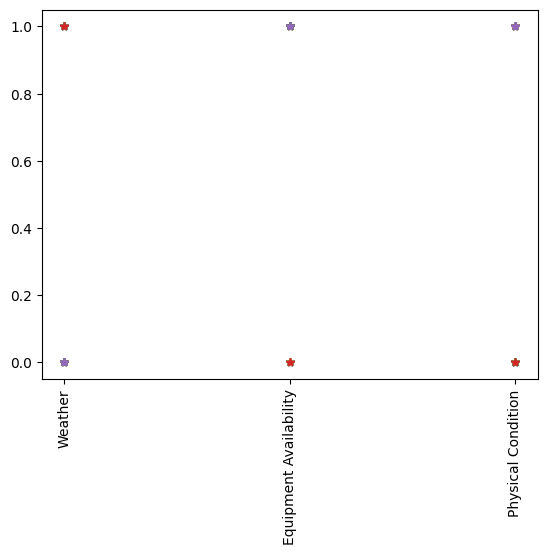

In [77]:
import matplotlib.pyplot as plt
plt.plot(X_test.T, "*")
plt.xticks(rotation = "vertical")
plt.show()

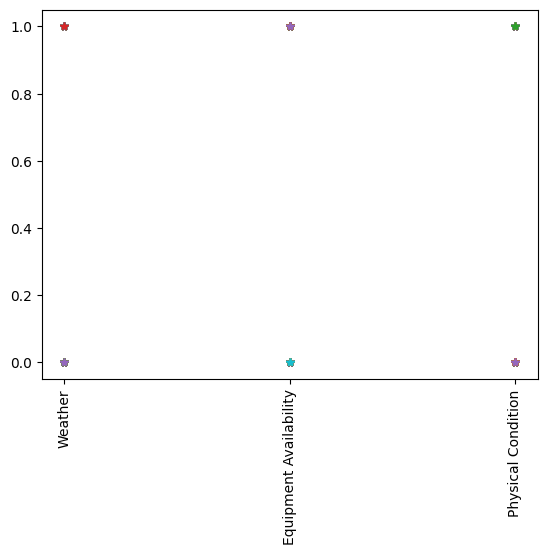

In [78]:
X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])
plt.plot(X_binarised_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [79]:
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])
X_binarised_test

,Weather,Equipment Availability,Physical Condition
304,1,0,1
491,1,1,0
318,1,1,0
131,0,0,0
46,0,1,0
...,...,...,...
163,1,0,0
488,0,1,1
268,0,0,1
15,0,1,1


In [80]:
type(X_binarised_test)

pandas.core.frame.DataFrame

In [81]:
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values
type(X_binarised_test)

numpy.ndarray

In [126]:
from random import randint

b = 2

i = randint(0, X_binarised_train.shape[0])

print('For row', i)

if (np.sum(X_binarised_train[i, :]) >= b):
  print('MP Neuron inference is to play the sport')
else:
  print('MP Neuron inference is not to play the sport')
  
if (Y_train[i] == 1):
  print('Ground truth is to play the sport')
else:
  print('Ground truth is not to play the sport')

For row 41
MP Neuron inference is to play the sport
Ground truth is to play the sport


In [132]:
Y_pred_train = []
accurate_rows = 0

for x, y in zip(X_binarised_train, Y_train):
  y_pred = (np.sum(x) >= b)
  Y_pred_train.append(y_pred)
  accurate_rows += (y == y_pred)
  
print(accurate_rows, accurate_rows/X_binarised_train.shape[0])

197 0.5253333333333333


In [134]:
for b in range(X_binarised_train.shape[1] + 1):
  Y_pred_train = []
  accurate_rows = 0

  for x, y in zip(X_binarised_train, Y_train):
    y_pred = (np.sum(x) >= b)
    Y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred)

  print(b, accurate_rows/X_binarised_train.shape[0])  

0 0.49333333333333335
1 0.49866666666666665
2 0.5253333333333333
3 0.496


In [135]:
from sklearn.metrics import accuracy_score

b = 2

Y_pred_test = []

for x in X_binarised_test:
  y_pred = (np.sum(x) >= b)
  Y_pred_test.append(y_pred)

accuracy = accuracy_score(Y_pred_test, Y_test)

print(b, accuracy) 

2 0.544


In [137]:
class MPNeuron:
  
  def __init__(self):
    self.b = None
    
  def model(self, x):
    return(sum(x) >= self.b)
  
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y):
    accuracy = {}
    
    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b
    
    print('Optimal value of b is', best_b)
    print('Highest accuracy is', accuracy[best_b])

In [138]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, Y_train)

Optimal value of b is 2
Highest accuracy is 0.5253333333333333


In [139]:
Y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)

print(accuracy_test)

0.544
